# Apriori

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

In [38]:
data=pd.read_csv('retail_dataset.csv')

In [25]:
items=(data['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [26]:
itemset = set(items)
encoded_values = []

for index, row in data.iterrows():
    rowset = set(row)
    labels = {}

    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))

    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1

    encoded_values.append(labels)

encoded_values[0]


{'Bagel': 0,
 'Milk': 0,
 'Bread': 1,
 'Meat': 1,
 'Cheese': 1,
 'Eggs': 1,
 'Diaper': 1,
 'Pencil': 1,
 'Wine': 1}

In [27]:
bin_data=pd.DataFrame(encoded_values)

In [28]:
import warnings 
warnings.simplefilter('ignore')

In [29]:
freq_items=apriori(bin_data, min_support=0.2, use_colnames=True,verbose=1)

Processing 4 combinations | Sampling itemset size 4 3


In [30]:
rules = association_rules(freq_items, metric='confidence',min_threshold=0.6)

In [31]:
for i in range(14):
    print("Rule: ",rules.antecedents[i],"-->",rules.consequents[i])
    print("Support: ",rules.support[i])
    print("Confidence: ",rules.confidence[i])
    print("*********************************************************")

Rule:  frozenset({'Bagel'}) --> frozenset({'Bread'})
Support:  0.27936507936507937
Confidence:  0.6567164179104478
*********************************************************
Rule:  frozenset({'Milk'}) --> frozenset({'Cheese'})
Support:  0.3047619047619048
Confidence:  0.6075949367088608
*********************************************************
Rule:  frozenset({'Cheese'}) --> frozenset({'Milk'})
Support:  0.3047619047619048
Confidence:  0.6075949367088608
*********************************************************
Rule:  frozenset({'Meat'}) --> frozenset({'Cheese'})
Support:  0.3238095238095238
Confidence:  0.68
*********************************************************
Rule:  frozenset({'Cheese'}) --> frozenset({'Meat'})
Support:  0.3238095238095238
Confidence:  0.6455696202531646
*********************************************************
Rule:  frozenset({'Eggs'}) --> frozenset({'Meat'})
Support:  0.26666666666666666
Confidence:  0.6086956521739131
****************************************

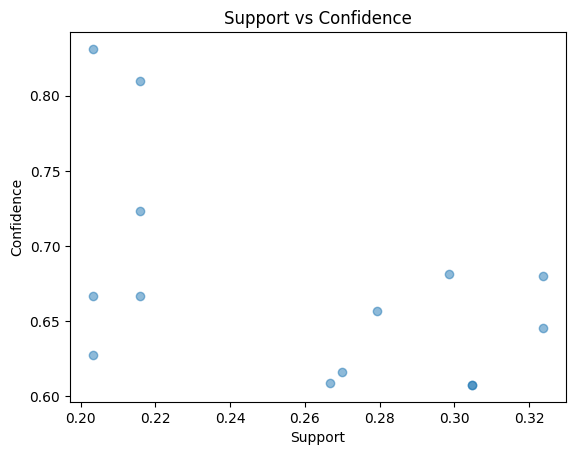

In [32]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

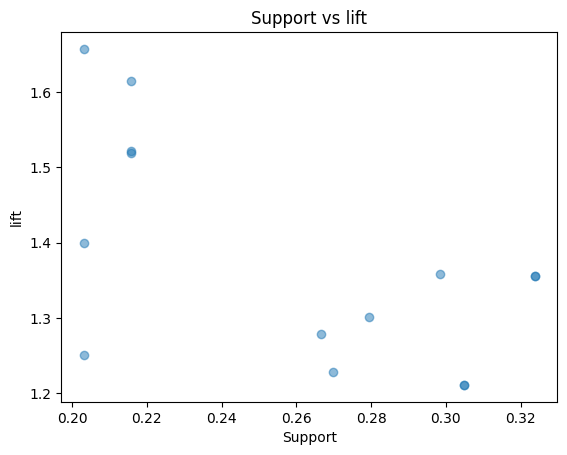

In [33]:
plt.scatter(rules['support'],rules['lift'],alpha=0.5)
plt.xlabel('Support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

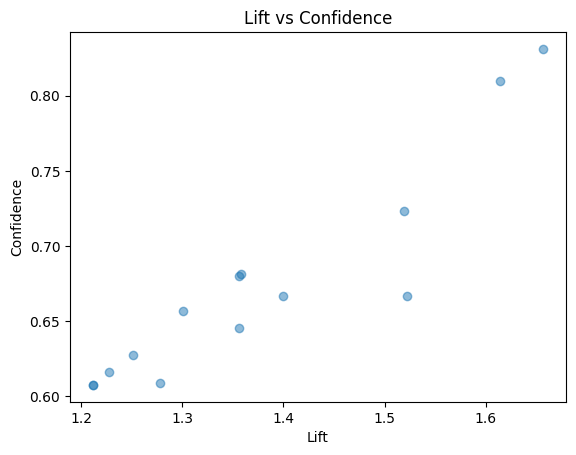

In [34]:
plt.scatter(rules['lift'],rules['confidence'],alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

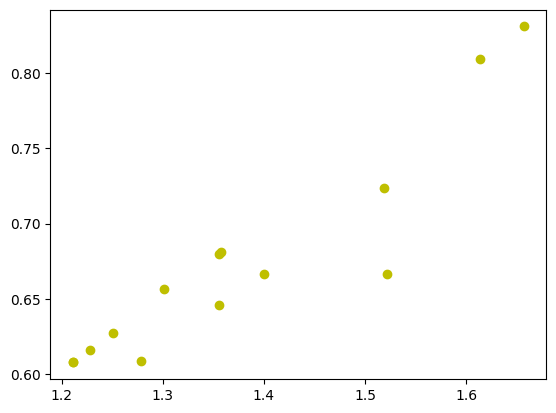

In [37]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', label='Data points')
plt.show()